In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<H1> Первичный осмотр данных и заполнение пропусков

In [45]:
df_train = pd.read_csv("Life_train.csv")
df_test = pd.read_csv("Life_test.csv")

In [46]:
df_train.head(20)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
5,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
6,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
7,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
8,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1
9,2005,57.3,291.0,85,0.02,1.388648,66.0,1296,14.2,118,58.0,8.70,58.0,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9


In [47]:
df_train.dtypes

Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [48]:
df_train.size, df_test.size

(49780, 8341)

<H2>Процент пропуска данных мал => можно заполнить модой/медианой/средним<H2>

In [49]:
print(round(max(df_train.isna().sum()) / df_train.size * 100, 2), "%")

df_train.isna().sum()

1.11 %


Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            167
percentage expenditure               0
Hepatitis B                        480
Measles                              0
 BMI                                28
under-five deaths                    0
Polio                               18
Total expenditure                  196
Diphtheria                          18
 HIV/AIDS                            0
GDP                                386
Population                         554
 thinness  1-19 years               28
 thinness 5-9 years                 28
Income composition of resources    146
Schooling                          146
dtype: int64

In [50]:
df_test.isna().sum()

Year                                0
Adult Mortality                     0
infant deaths                       0
Alcohol                            26
percentage expenditure              0
Hepatitis B                        73
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               1
Total expenditure                  30
Diphtheria                          1
 HIV/AIDS                           0
GDP                                57
Population                         90
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    14
Schooling                          14
dtype: int64

<H2>С пропусками в тестовом аналогично

In [51]:
print(round(max(df_test.isna().sum()) / df_train.size * 100, 2), "%")

df_test.isna().sum()

0.18 %


Year                                0
Adult Mortality                     0
infant deaths                       0
Alcohol                            26
percentage expenditure              0
Hepatitis B                        73
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               1
Total expenditure                  30
Diphtheria                          1
 HIV/AIDS                           0
GDP                                57
Population                         90
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    14
Schooling                          14
dtype: int64

In [52]:
for col in df_train.columns:
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [53]:
for col in df_test.columns:
    df_test[col] = df_test[col].fillna(df_train[col].median())

<H1> Визуальный анализ

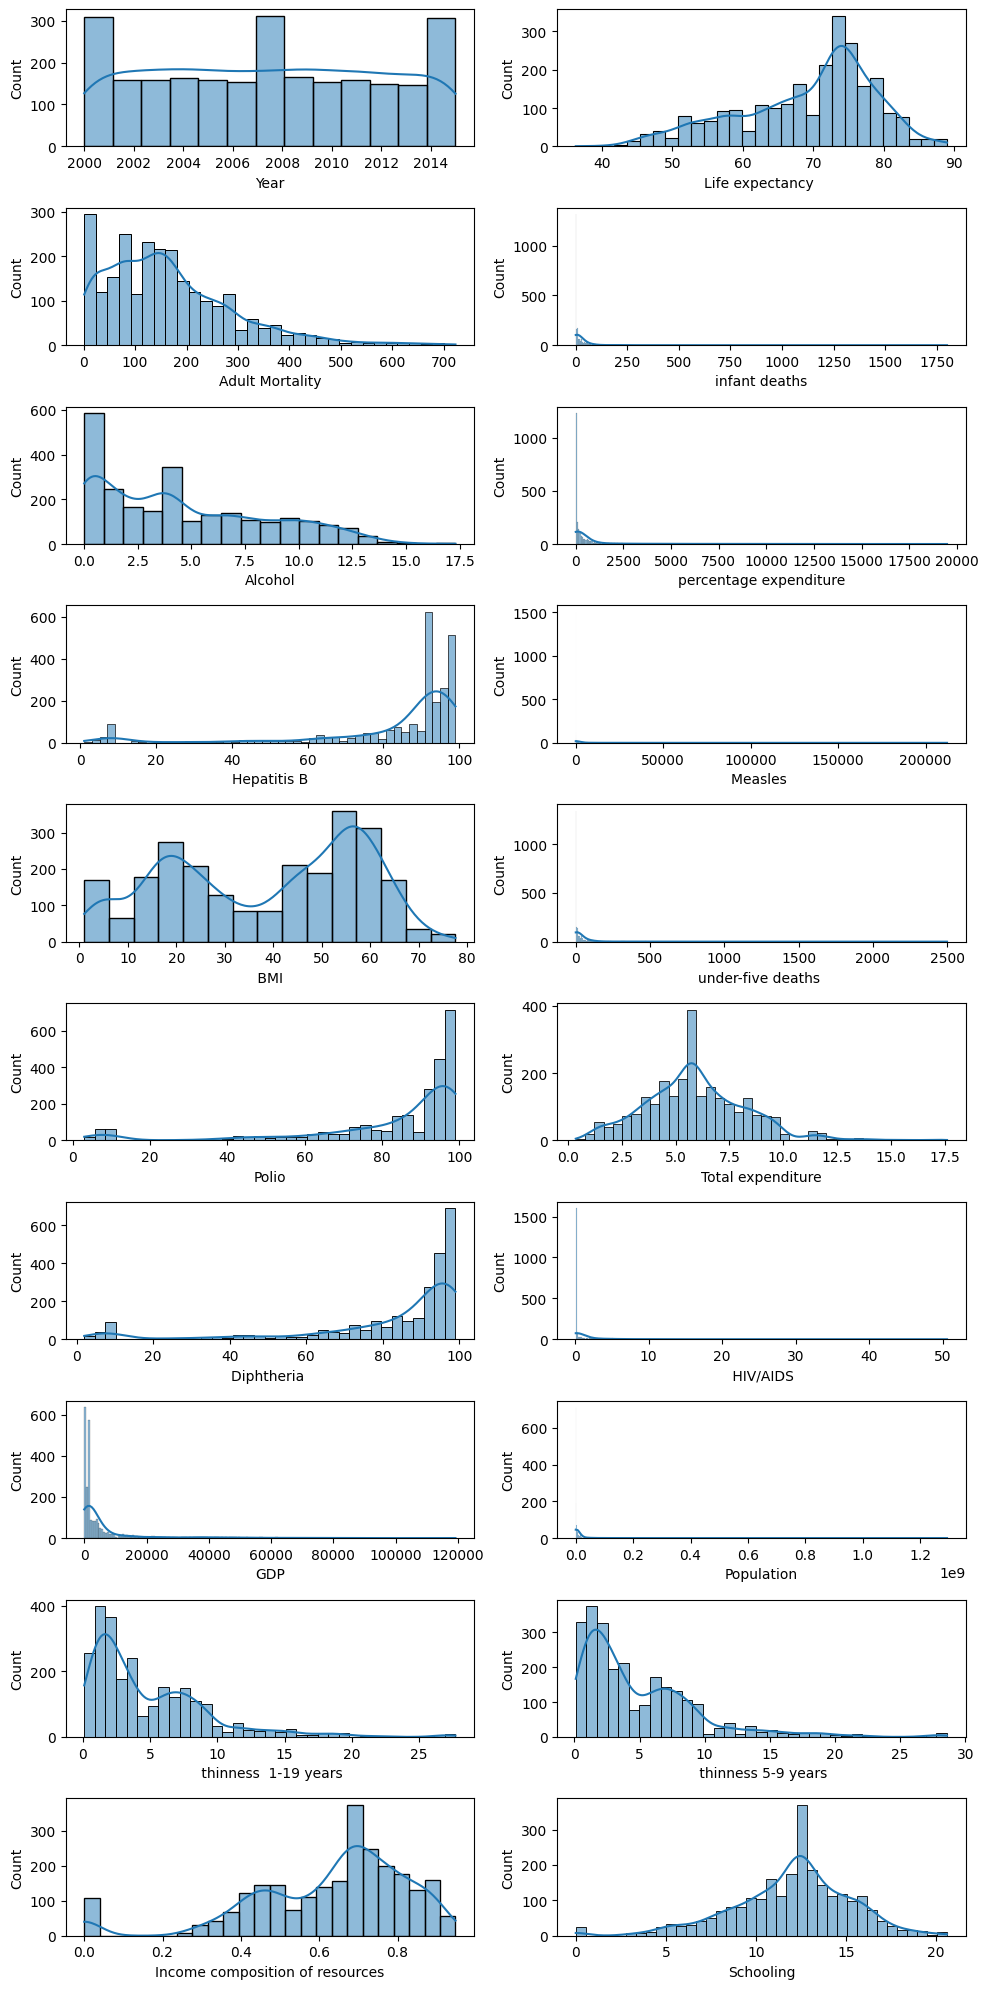

In [54]:
fig, ax = plt.subplots(10, 2, figsize=(10, 20))

for i, col in enumerate(df_train.columns):
    plt.subplot(10, 2, i + 1)
    sns.histplot(df_train[col].dropna(), kde=True)
    

plt.tight_layout()
plt.show()


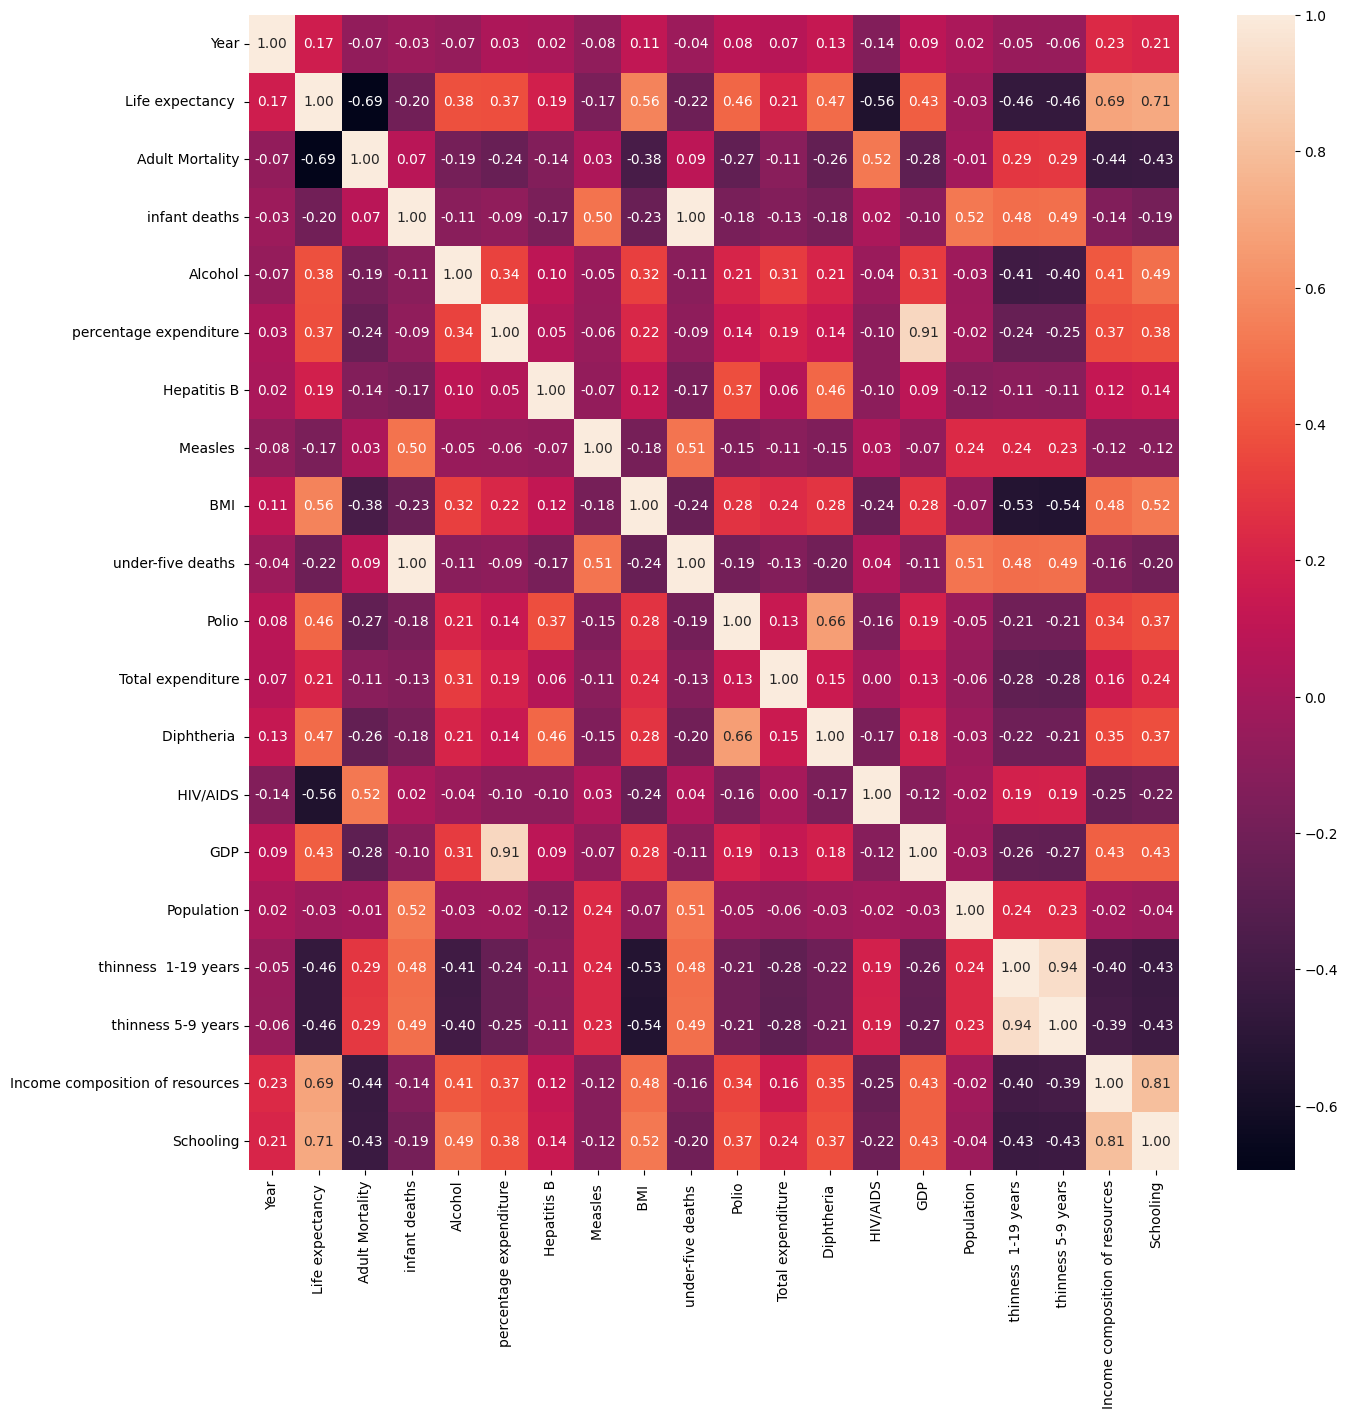

In [55]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f");

<h3>Имеем много коррелирующих величин, от которых нужно избавиться<br>
Можно убрать в ручную или использовать Lasso регрессию, чтобы модель сделала это за нас

<h1> Построение моделей

In [56]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [57]:
X, Y = df_train.drop("Life expectancy ", axis=1), df_train["Life expectancy "]

In [58]:
X

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,2005,717.0,28,4.14,8.717409,65.0,420,27.5,43,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2485,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2486,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2487,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [59]:
X["Year"].value_counts()

Year
2009    165
2004    162
2011    159
2005    158
2000    158
2003    158
2002    158
2007    157
2015    157
2008    155
2006    153
2010    153
2014    150
2001    150
2012    149
2013    147
Name: count, dtype: int64

In [60]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)

In [61]:
x_poly.shape

(2489, 210)

In [62]:
scaler = StandardScaler()
# scaler = MinMaxScaler()

x_poly_scaled = scaler.fit_transform(x_poly);

In [63]:
x_train, x_valid, y_train, y_valid = train_test_split(x_poly_scaled, Y, test_size=0.15) # , random_state=52

In [64]:
model1 = Lasso()

model1.fit(x_train, y_train);

mean_squared_error(y_valid, model1.predict(x_valid))

19.7769093735374

In [65]:
model2 = Ridge()
model2.fit(x_train, y_train)

mean_squared_error(y_valid, model2.predict(x_valid))

9.679872043064034

In [66]:
model3 = LinearRegression()

model3.fit(x_train, y_train)
mean_squared_error(y_valid, model3.predict(x_valid))

10.408879071283772

<h2>Baseline модели построен, попробуем использовать другие и подберём необходимые параметры

In [67]:
from sklearn.linear_model import LassoCV


alphas = [0.000005,0.00001,0.00005,0.0001, 0.0005, 0.001,0.005, 0.02, 0.1, 0.3, 0.5, 0.8, 1, 10]
model1_cv = LassoCV(alphas=alphas, cv=5, n_jobs=-3, max_iter=3000)
model1_cv.fit(x_train, y_train)

/home/egorl/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.596603995985788, tolerance: 15.693870884160756
  model = cd_fast.enet_coordinate_descent_gram(
/home/egorl/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.77626432408215, tolerance: 15.931161808510634
  model = cd_fast.enet_coordinate_descent_gram(
/home/egorl/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.397681974276566, tolerance: 16.043617250000004
  model = cd_fast.enet_coordinate_descent_gram(
/home/egorl/.local/lib/python3.10/site-packages/sklearn/linear_model/_coor

LassoCV(alphas=[5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.02, 0.1,
                0.3, 0.5, 0.8, 1, 10],
        cv=5, max_iter=3000, n_jobs=-3)

In [68]:
model1_cv.alpha_

0.02

In [69]:
for i, j in zip(df_train.columns, np.round(model1_cv.coef_, 3)):
    print(i, j)

Year 0.0
Life expectancy  0.0
Adult Mortality 3.217
infant deaths -0.0
Alcohol 0.987
percentage expenditure 0.0
Hepatitis B -0.0
Measles  -0.0
 BMI  2.959
under-five deaths  -0.459
Polio 0.0
Total expenditure 0.0
Diphtheria  -0.0
 HIV/AIDS -3.579
GDP 0.0
Population 0.0
 thinness  1-19 years -0.0
 thinness 5-9 years -1.334
Income composition of resources -0.0
Schooling 0.953


In [70]:
mean_squared_error(y_valid, model1_cv.predict(x_valid))

9.545537309779535

In [71]:
from sklearn.linear_model import RidgeCV


alphas = [0.000005,0.00001,0.00005,0.0001, 0.0005, 0.001, 0.005, 0.02, 0.1, 0.3, 0.5, 0.8, 1, 3, 5, 7]
model2_cv = RidgeCV(alphas=alphas, cv=5)
model2_cv.fit(x_train, y_train)

RidgeCV(alphas=[5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.02, 0.1,
                0.3, 0.5, 0.8, 1, 3, 5, 7],
        cv=5)

In [72]:
model2_cv.alpha_

7.0

In [30]:
for i, j in zip(df_train.columns, np.round(model2_cv.coef_, 3)):
    print(i, j)

Year 0.0
Life expectancy  0.093
Adult Mortality 2.487
infant deaths 1.0
Alcohol 1.925
percentage expenditure 1.717
Hepatitis B -0.251
Measles  0.237
 BMI  1.71
under-five deaths  -1.672
Polio -0.299
Total expenditure -0.12
Diphtheria  -0.006
 HIV/AIDS -3.144
GDP 1.252
Population 0.984
 thinness  1-19 years -0.805
 thinness 5-9 years -0.333
Income composition of resources -0.457
Schooling 0.467


In [31]:
mean_squared_error(y_valid, model2_cv.predict(x_valid))

6.512712137200899

In [32]:
X.shape

(2489, 19)

In [33]:
df_test.shape

(439, 19)

In [34]:
model2_cv.fit(x_poly_scaled, Y)

test_poly = poly.transform(df_test)
test_poly_scaled = scaler.transform(test_poly)

ans = pd.DataFrame({"Life expectancy": model2_cv.predict(test_poly_scaled)}, index=df_test.index)

ans

,Life expectancy
0,76.398107
1,74.672428
2,73.976789
3,54.954853
4,67.920210
...,...
434,63.022799
435,72.659870
436,76.637723
437,83.910893


**ЧИТЫ**

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=5000,
    criterion="squared_error",
    n_jobs=-3,
    verbose=1,
    max_features="sqrt",
)

rf_model.fit(x_train, y_train)

mean_squared_error(y_valid, rf_model.predict(x_valid))

[Parallel(n_jobs=-3)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=-3)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-3)]: Done 172 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-3)]: Done 422 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-3)]: Done 772 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-3)]: Done 1222 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-3)]: Done 1772 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-3)]: Done 2422 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-3)]: Done 3172 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-3)]: Done 4022 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-3)]: Done 4972 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-3)]: Done 5000 out of 5000 | elapsed:    6.3s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_j

2.6985070897199765

In [36]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 5000,
 'n_jobs': -3,
 'oob_score': False,
 'random_state': None,
 'verbose': 1,
 'warm_start': False}

**ЧИТЫ**

In [37]:
import xgboost as xgb

params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.02,
    'n_estimators': 500,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Instantiate XGBRegressor with the parameters
model = xgb.XGBRegressor(**params)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_valid)

# Evaluate model performance
mse = mean_squared_error(y_valid, y_pred)

mse

2.2727530906691147

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', n_jobs=-3, p=1)

for i in range(1, 20):
    knn_model.n_neighbors = i
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_valid)
    mse = mean_squared_error(y_valid, y_pred)
    print(f"Neighbors: {i}, MSE: {mse:.2f}")
    
best_n = 4

Neighbors: 1, MSE: 4.24
Neighbors: 2, MSE: 3.86
Neighbors: 3, MSE: 4.65
Neighbors: 4, MSE: 4.78
Neighbors: 5, MSE: 5.21
Neighbors: 6, MSE: 5.21
Neighbors: 7, MSE: 5.66
Neighbors: 8, MSE: 5.86
Neighbors: 9, MSE: 6.40
Neighbors: 10, MSE: 6.79
Neighbors: 11, MSE: 6.78
Neighbors: 12, MSE: 6.73
Neighbors: 13, MSE: 6.94
Neighbors: 14, MSE: 7.33
Neighbors: 15, MSE: 7.50
Neighbors: 16, MSE: 7.60
Neighbors: 17, MSE: 7.82
Neighbors: 18, MSE: 7.98
Neighbors: 19, MSE: 8.10


In [39]:
knn_model_best = KNeighborsRegressor(n_neighbors=4, weights='uniform', n_jobs=-3, p=1)

knn_model_best.fit(x_poly_scaled, Y)

test_poly = poly.transform(df_test)
test_poly_scaled = scaler.transform(test_poly)

ans_knn = pd.DataFrame({"index": Y.index, "Life expectancy": knn_model_best.predict(test_poly_scaled)}, index=df_test.index)

ans_knn

,index,Life expectancy
0,0,75.625
1,1,73.775
2,2,75.675
3,3,61.550
4,4,67.600
...,...,...
434,434,63.825
435,435,75.300
436,436,75.425
437,437,81.650


In [40]:
test_poly_scaled

array([[ 0.        , -0.53432176, -0.39592759, ...,  0.76856189,
         0.62159332,  0.42159915],
       [ 0.        ,  0.7720897 , -0.21202467, ...,  0.92082047,
         1.10653981,  1.25183439],
       [ 0.        , -0.96979225, -0.3159698 , ...,  0.42908167,
         0.31283366,  0.13662323],
       ...,
       [ 0.        ,  0.98982494, -1.21949282, ...,  0.57186637,
         0.49040508,  0.34873598],
       [ 0.        ,  0.55435446, -0.86767854, ...,  1.88568178,
         1.51187339,  1.12594304],
       [ 0.        , -1.62299798,  1.80291162, ..., -2.0106646 ,
        -1.99109487, -1.86886783]])

In [41]:
assert False

AssertionError: 

In [ ]:
ans_knn.to_csv("knn_submission.csv", index=False)

In [ ]:
ans.to_csv("3submission.csv", index=False)